<h1><center> EXPL Project2-1 Diabets </center></h1>
<center>Project2-1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!</center>

프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
(1) 데이터 가져오기
(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
(4) X, y 컬럼 선택 및 train/test 데이터 분리
(5) LinearRegression 모델 학습
(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

**Content**<br>
(1) 데이터 가져오기<br>
(2) 모델에 입력할 데이터 X 준비하기<br>
(3) 모델에 예측할 데이터 y 준비하기<br>
(4) train 데이터와 test 데이터로 분리하기<br>
(5) 모델 준비하기<br>
(6) 손실함수 loss 정의하기<br>
(7) 기울기를 구하는 gradient 함수 구현하기<br>
(8) 하이퍼 파라미터인 학습률 설정하기<br>
(9) 모델 학습하기<br>
(10) test 데이터에 대한 성능 확인하기<br>
(11) 정답 데이터와 예측한 데이터 시각화하기<br>

- Data Information: [당뇨병 환자 데이터와 다중 선형회귀](https://yhyun225.tistory.com/11)

In [119]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [228]:
diabetes = load_diabetes()
df_X = diabetes.data 
df_y = diabetes.target
print(df_X, df_y)
pd.DataFrame(df_X, df_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

,0,1,2,3,4,5,6,7,8,9
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [136]:
df_X.shape[1]

10

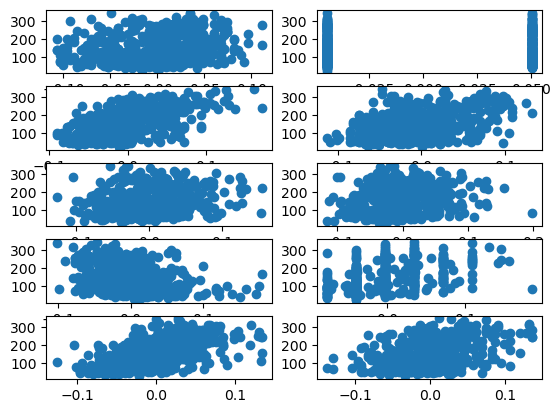

In [137]:
for i in range(df_X.shape[1]):
    plt.subplot(5,2,i+1).scatter(df_X[:,i], df_y)
# 1번 데이터 좀 이상함
# 8번 데이터 노이즈 낀 것 같음

## 모델에 입력할 데이터 X 준비하기

In [111]:
print(type(df_X), df_X.shape)

<class 'numpy.ndarray'> (442, 10)


## 모델에 예측할 데이터 y 준비하기

In [112]:
print(type(df_y), df_y.shape)

<class 'numpy.ndarray'> (442,)


## train 데이터와 test 데이터로 분리하기

In [243]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size= .2, random_state=42)

## 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [149]:
W = np.random.randn(X_train.shape[1])
b = np.random.randn()
W, b

(array([-0.34472703,  0.60892743,  1.17677204,  0.11294532, -1.76641584,
        -0.19172662, -0.82756077, -1.81206254, -0.76247383,  1.38698467]),
 1.8082803036754937)

In [236]:
def model(X,W,b):
    predictions = 0
    for i in range(X.shape[1]):

        predictions += X[:,i] * W[i]

    predictions += b
    
    return predictions

(353,)

## 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [42]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X,W,b,y):
    y_pred = model(X,W,b)
    loss = MSE(y, y_pred)
    return loss

In [46]:
loss(df_X, W, b, df_y)

28993.429281406443

## 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [61]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [270]:
LEARNING_RATE = 0.1

## 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [245]:
# # 1번 지우기
# X_train = X_train[:,[0,2,3,4,5,6,7,8,9]]
# print(X_train.shape, y_train.shape)

(353,)

In [274]:
# W, b값 재설정
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
W, b

(array([0.46868253, 0.32347395, 0.73996306, 0.8015697 , 0.04592582,
        0.08774415, 0.32304351, 0.37264614, 0.17204756, 0.22981357]),
 0.6511118282903917)

In [275]:
losses = []
for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3442.7338
Iteration 2000 : Loss 3093.8332
Iteration 3000 : Loss 2978.9224
Iteration 4000 : Loss 2933.6924
Iteration 5000 : Loss 2914.6762


(0.0, 50.0)

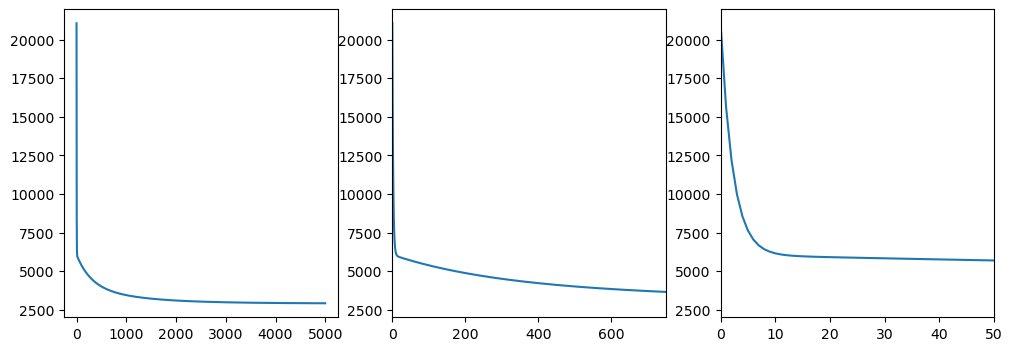

In [290]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1).plot(losses)
plt.subplot(1,3,2).plot(losses)
plt.xlim(0,750)
plt.subplot(1,3,3).plot(losses)
plt.xlim(0,50)

- 20번 이후로는 loss에 큰 변화가 없음

##  test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [292]:
print(W, b)
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

[  41.86872397 -203.31255035  509.54388624  325.13063878  -70.85616517
 -119.33587468 -216.1759589   144.57370269  376.35458248  111.93281735] 151.37281720062714


2867.0221907021455

## 정답 데이터와 예측한 데이터 시각화하기

ValueError: x and y must be the same size

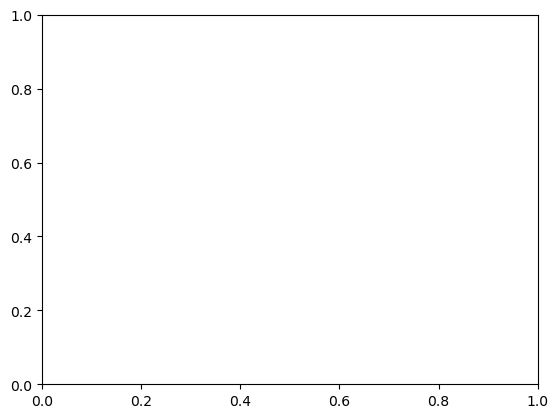

In [294]:
plt.scatter(X_train[:, 0], y_test)
plt.scatter(X_train[:, 0], prediction)
plt.show()